In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import torch
import cv2
import nltk

2023-06-07 19:40:21.536858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# 使用 sklearn 內建的資料集
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# 將資料集切割成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 使用 Logistic Regression 分類器
clf = LogisticRegression()
clf.fit(X_train, y_train)

/Users/linchunho/Developer/weather-ai/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

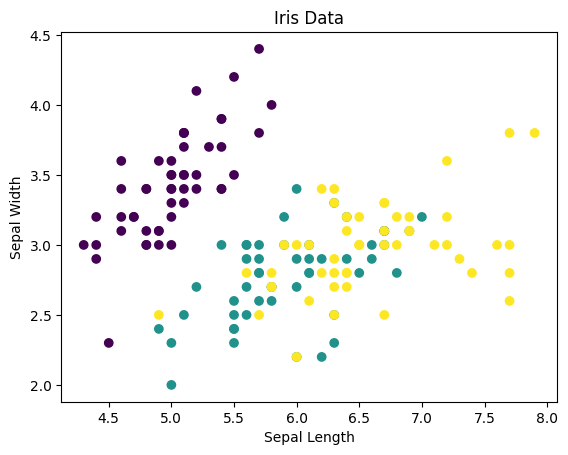

In [5]:
# 使用 Matplotlib 繪製資料和分類結果
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Data')
plt.show()

In [6]:
# 使用 Pandas 讀取資料集並顯示前幾筆資料
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [7]:
# 使用 Keras 建立一個簡單的神經網路模型
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

2023-06-07 19:40:30.610958: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# 使用 TensorFlow 設定運算配置並訓練模型
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
keras.backend.set_session(session)

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 1.6958 - accuracy: 0.3250
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5407 - accuracy: 0.3250
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1.4072 - accuracy: 0.3250
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 1.2838 - accuracy: 0.3333
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 1.1883 - accuracy: 0.4167
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0768 - accuracy: 0.6000
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9737 - accuracy: 0.6500
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 0.8815 - accuracy: 0.6583
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.8033 - accuracy: 0.6583
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.7366 - accuracy: 0.6583
Epoch 11/

In [10]:
# 使用 PyTorch 建立一個簡單的神經網路模型
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(4, 10)
        self.fc2 = torch.nn.Linear(10, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [11]:
net = Net()

In [12]:
# 設定運算裝置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

Net(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
)

In [13]:
# 定義損失函數和優化器
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

In [14]:
# 轉換訓練資料為 Tensor
inputs = torch.Tensor(X_train).to(device)
labels = torch.Tensor(y_train).long().to(device)

In [15]:
# 訓練模型
for epoch in range(100):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

print("All packages are installed and working correctly!")


All packages are installed and working correctly!
